This code imports the long dataset from UCI Machine Learning Repository to tidy it.

URL Source: https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption



In [2]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt

## Importing dataset

### Dataset Information

This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).  
Notes:   
1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.  
2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.  

### Variable Information
1.date: Date in format dd/mm/yyyy  
2.time: time in format hh:mm:ss  
3.global_active_power: household global minute-averaged active power (in kilowatt)  
4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)  
5.voltage: minute-averaged voltage (in volt)  
6.global_intensity: household global minute-averaged current intensity (in ampere)  
7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).  
8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.  
9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.  


Source: https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption


In [179]:
df_ori = pd.read_csv('data/household_power_consumption.txt', sep=';', header=0)

# convert variable names to lowercase
df_ori.rename(columns=lambda x: x.lower(), inplace=True)
df_ori.head()


C:\Users\augus\AppData\Local\Temp\ipykernel_21956\2838674969.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ori = pd.read_csv('data/household_power_consumption.txt', sep=';', header=0)


,date,time,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [180]:
# Replicate the original dataframe
df = df_ori.copy()
df.head()


,date,time,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [181]:
# Number of rows with NaN values for each specified column
na_rows_count = df[['global_active_power', 'global_reactive_power', 'voltage', 'global_intensity', 'sub_metering_1', 'sub_metering_2', 'sub_metering_3']].isna().any(axis=1).sum()

# Percentage of rows with NaN values
percentage_na_rows = (na_rows_count / len(df)) * 100

print("Number of rows with NaN values in the specified columns: {}".format(na_rows_count))
print("Percentage of rows with NaN values: {:.2f}%".format(percentage_na_rows))

Number of rows with NaN values in the specified columns: 25979
Percentage of rows with NaN values: 1.25%


In [182]:
# Since the number of empty rows is not significant, let's drop it:

print("Number of rows before dropping NaN values: {}".format(len(df)))
df_cleaned = df.dropna(subset=['global_active_power', 'global_reactive_power', 'voltage', 'global_intensity', 'sub_metering_1', 'sub_metering_2', 'sub_metering_3'])

# Verify the result
print("Number of rows after dropping NaN values: {}".format(len(df_cleaned)))

Number of rows before dropping NaN values: 2075259
Number of rows after dropping NaN values: 2049280


In [183]:
# This chunk will resample the dataset in daily and hourly formats

# Create a copy of the DataFrame
df_cleaned = df_cleaned.copy()

# Convert 'date' and 'time' to datetime and create a new 'datetime' column
df_cleaned['datetime'] = pd.to_datetime(df_cleaned['date'] + ' ' + df_cleaned['time'])

# Drop the unnecessary 'date' and 'time' columns
df_cleaned.drop(['date', 'time'], axis=1, inplace=True)

# Set the 'datetime' column as the index
df_cleaned.set_index('datetime', inplace=True)

# Ensure numeric columns are in the correct data type
numeric_columns = ['global_active_power', 'global_reactive_power', 'voltage', 'global_intensity', 'sub_metering_1', 'sub_metering_2', 'sub_metering_3']
df_cleaned[numeric_columns] = df_cleaned[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Define aggregation functions for each column
agg_functions = {
    'global_active_power': 'sum',
    'global_reactive_power': 'sum',
    'voltage': 'mean',
    'global_intensity': 'sum',
    'sub_metering_1': 'sum',
    'sub_metering_2': 'sum',
    'sub_metering_3': 'sum'
}

# Resample the DataFrame by hour and aggregate using the defined functions
df_hourly = df_cleaned.resample('H').agg(agg_functions)
df_daily = df_cleaned.resample('D').agg(agg_functions)


# Reset the index if needed
df_hourly.reset_index(inplace=True)
df_daily.reset_index(inplace=True)

C:\Users\augus\AppData\Local\Temp\ipykernel_21956\4204615435.py:7: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_cleaned['datetime'] = pd.to_datetime(df_cleaned['date'] + ' ' + df_cleaned['time'])


In [184]:
df_daily

,datetime,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3
0,2006-12-16,1209.176,34.922,236.243763,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,240.087028,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,241.231694,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,241.999313,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,242.308062,9313.0,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...,...
1437,2010-11-22,2041.536,142.354,240.197118,8660.4,4855.0,2110.0,10136.0
1438,2010-11-23,1577.536,137.450,240.575528,6731.2,1871.0,458.0,7611.0
1439,2010-11-24,1796.248,132.460,240.030965,7559.4,1096.0,2848.0,12224.0
1440,2010-11-25,1431.164,116.128,241.536257,6004.0,1076.0,426.0,5072.0


In [216]:
# Fill some empty "voltage" values with 0

df_daily.voltage[df_daily["voltage"].isna()] = 0


C:\Users\augus\AppData\Local\Temp\ipykernel_21956\2213764109.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daily.voltage[df_daily["voltage"].isna()] = 0


In [222]:
#Let's check if our dataset misses any day

# Get the min and max day from 'datetime' variable in our dataset
min_date = df_daily['datetime'].min()
max_date = df_daily['datetime'].max()

# Generate a sequence of all dates between the minimum and maximum dates
all_dates = pd.date_range(start=min_date, end=max_date, freq='D')

# Check for missing dates
missing_dates = all_dates[~all_dates.isin(df_daily['datetime'])]

# Print the missing dates
print("Missing dates:", missing_dates)

Missing dates: DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [221]:
missing_dates

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [219]:
#Let's check if our dataset misses any hour

# Get the min and max date/time from 'datetime' variable in our dataset
min_date = df_hourly['datetime'].min()
max_date = df_hourly['datetime'].max()

# Generate a sequence of all date/time between the minimum and maximum dates
all_dates = pd.date_range(start=min_date, end=max_date, freq='H')

# Check for missing dates
missing_dates = all_dates[~all_dates.isin(df_hourly['datetime'])]

# Print the missing dates
print("Missing dates:", missing_dates)

Missing dates: DatetimeIndex([], dtype='datetime64[ns]', freq='H')


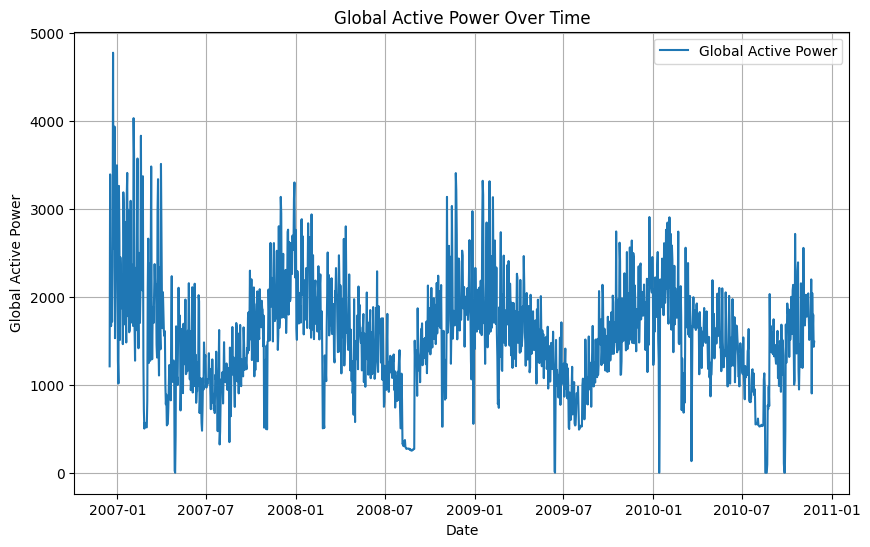

In [223]:


# Let's plot our daily consumption
plt.figure(figsize=(10, 6))
plt.plot(df_daily['datetime'], df_daily['global_active_power'], label='Global Active Power')
plt.title('Global Active Power Over Time')
plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.legend()
plt.grid(True)
plt.show()

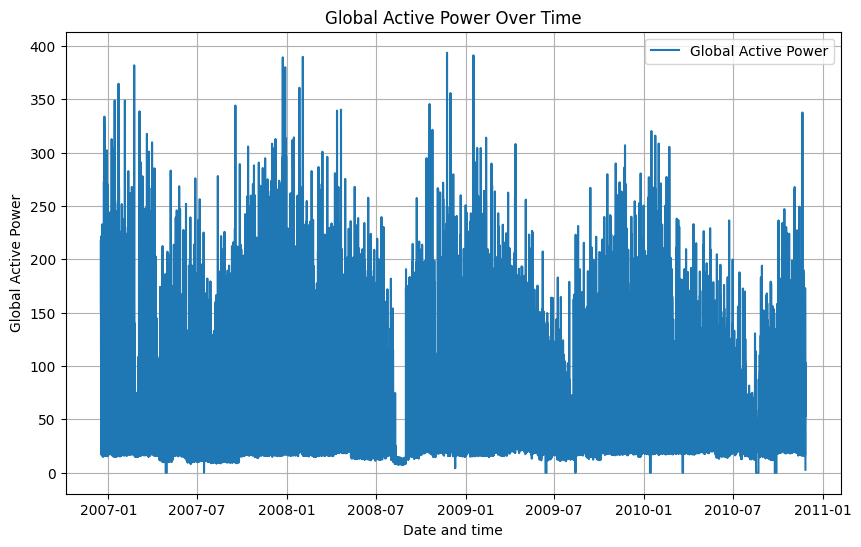

In [224]:
# Let's plot our hourly consumption
plt.figure(figsize=(10, 6))
plt.plot(df_hourly['datetime'], df_hourly['global_active_power'], label='Global Active Power')
plt.title('Global Active Power Over Time')
plt.xlabel('Date and time')
plt.ylabel('Global Active Power')
plt.legend()
plt.grid(True)
plt.show()